# VA 2022-2023 sem-2 Opdracht 2

Vul je naam in en die van je groepsgenoot: Kyra van den Akker & Yorrid van Groningen

## Deadline

De deadline voor deze opdracht is woensdag 10:00.

## Palmer Archipelago (Antarctica) penguin

We maken gebruik van de dataset `Palmer Archipelago (Antarctica) penguin`. Download de `penguins_size` CSV bestand van Brightspace en plaats het in dezelfde folder waarin je werkt. Deze dataset laden we in via pandas. Zoals in opdracht 1 gebruiken we functies `head`, `info` en `describe` om de data te inspecteren. De data bevat de volgende informatie:
* species: pinguïnsoorten (Chinstrap, Adélie of Gentoo)
* culmen_length_mm: lengte bovenste rand van een snavel (mm)
* culmen_depth_mm: snavel hoogte (mm)
* flipper_length_mm: vleugel lengte (mm)
* body_mass_g: lichaamsmassa (g)
* island: eilandnaam (Dream, Torgersen of Biscoe) in de Palmer Archipelago (Antarctica)
* sex: geslacht van de pinguins

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('penguins_size.csv')

In [44]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [46]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# Deel 1 - Seaborn
## Onderdeel 1
Laten we eerst een aantal boxplots maken van het gewicht en pinguïnsoort. We maken de opdrachten deze week eerst in `seaborn` en na dit onderdeel in `plotly`. 

* Zet de boxplots in verticale richting. (het pinguïnsoort komt op de x-as, gewicht op de y-as)
* Geef de visualusatie geschikte titels en labels. Zie: https://www.delftstack.com/howto/seaborn/set-axis-labels-seaborn-python/ voor de labels
* Verander de volgorde van de boxplots. Van links naar rechts: Gentoo, Adelie, Chrinstrap.

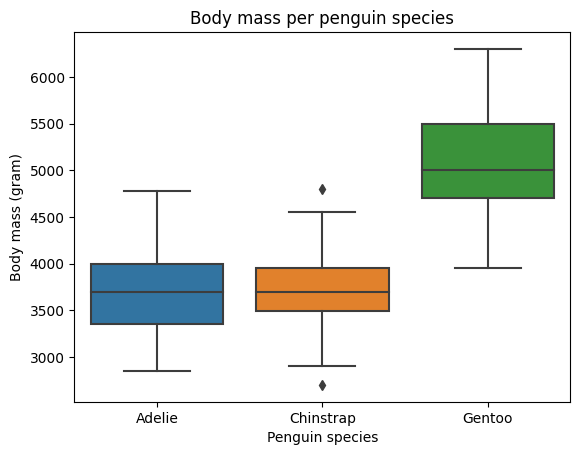

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.boxplot(data=df, x=df['species'], y=df['body_mass_g'])
plt.title('Body mass per penguin species')
plt.xlabel('Penguin species')
plt.ylabel('Body mass (gram)')
plt.show()


Voeg nu de volgende onderdelen toe aan je vorige plot:
* Maak de boxplots dunner.
* Geef de boxplots een andere kleur dan de standaardkleur.
* Vermeld boven de mediaan in de boxplots de waarde van de mediaan.

In [107]:
## welke values heb je nodig?
medians = df.groupby(['species'])['body_mass_g'].median()
medians

species
Adelie       3700.0
Chinstrap    3700.0
Gentoo       5000.0
Name: body_mass_g, dtype: float64

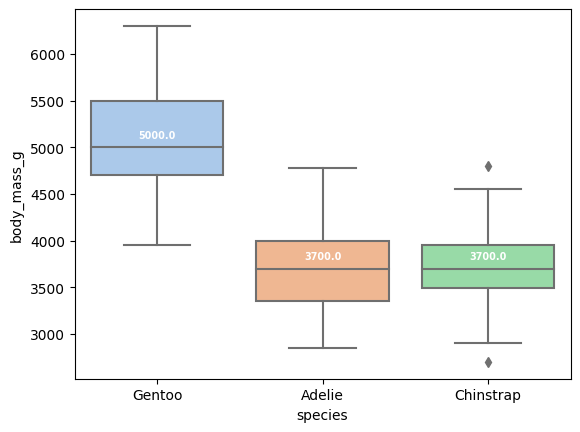

In [114]:
order = ['Gentoo', 'Adelie', 'Chinstrap']
ax = sns.boxplot(data=df, x=df['species'], y=df['body_mass_g'], order=order, palette='pastel')


#selecteren obv index
medians = medians.reindex(order)

pos = range(len(medians))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 100, medians[tick], 
            horizontalalignment='center', size='x-small', color='w', weight='semibold')
    
plt.show()

## Onderdeel 2

Maak een scatterplot van de data met op de x-as de lengte van de snavel en op y-as de hoogte van de snavel.
* Zorg dat alle verschillende soorten een eigen kleur hebben.
* Geef de visualisatie geschikte titels en labels
* Geef de titel een rode kleur.


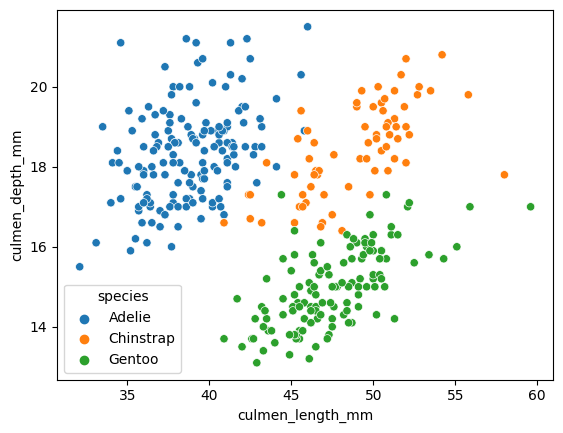

In [51]:
ax = sns.scatterplot(data=df, x=df['culmen_length_mm'], y=df['culmen_depth_mm'], hue=df['species'])

We zijn nu benieuwd naar de relatie tussen het gewicht en de vleugelgrootte per pinguinsoort. Maak een spreidingsdiagram van de twee variabelen. Voldoe aan de volgende eisen.

* Geef elk soort een eigen kleur en markeervorm. (denk aan rondjes, sterretjes en plusjes). Gebruik `markers`.
* Zet `height` parameter op 8.
* Gebruik een functie in seaborn om een lineaire regressielijn toe te voegen voor elk soort (`sns.lmplot`). Verwijder het betrouwbaarheidsinterval (het gebied om de regressielijn) met `ci = None`.
* Geef de visualusatie geschikte titels. (boven, en x- en y-assen)
* Geef de legenda een passende titel

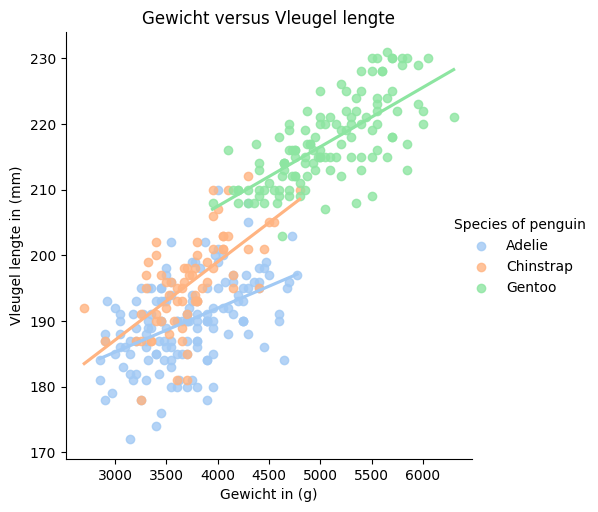

In [134]:
g = sns.lmplot(data = df, x= 'body_mass_g', y= 'flipper_length_mm', hue= 'species', ci=None, palette='pastel')

new_title = 'Species of penguin'
g._legend.set_title(new_title)
g.set(title='Gewicht versus Vleugel lengte',xlabel='Gewicht in (g)',ylabel='Vleugel lengte in (mm)')

plt.show()

# Deel 2 - Plotly
## Onderdeel 3

Laten we eerst een aantal boxplots maken van het gewicht en pinguïnsoort. Zoals alle verdere opdrachten maken we de volgende visualisaties met `plotly`.

* Zet de boxplots in verticale richting. (het pinguïnsoort komt op de x-as)
* Geef de visualusatie geschikte titels. (boven, en x- en y-assen)
* Geef alle verschillende soorten een andere kleur. Gebruik hiervoor een andere kleurenverdeling dan de standaard.
* Verander de volgorde van de boxplots. Van links naar rechts: Gentoo, Adelie, Chinstrap.

In [2]:
import plotly.express as px

# Wanneer je een error krijgt, installeer dan plotly, zie https://plotly.com/python/getting-started/

In [16]:
fig = px.box(df, x="species", y="body_mass_g", title='Body mass per penguin species', labels={
                     "body_mass_g": "Body mass (gram)",
                     "species": "Penguin species",
                 }, color="species")
fig.update_xaxes(categoryorder='array', categoryarray=['Gentoo', 'Adelie', 'Chinstrap'])
fig.show()

Beantwoord op basis van de laatst gemaakte visualisatie.

* Welke uitspraak kan je maken met betrekking tot de lichaamsmassa en het pinguïnsoort?

Antwoord: De lichaamsmassa mediaan van de Adelie en Chinstrap liggen redelijk gelijk en bij de Gentoo pinguinsoort licht deze een stuk hoger. De Gentoo penguin is over het algemeen sowieso zwaarder.



Voordat we aan de slag gaan met de distplot gaan we een histogram maken van de lengte van de vleugels (`flipper_length_mm`) van de drie pinguïnsoorten.
* Gebruik de px.histogram om een histogram te maken.
* Zorg dat elke soort een eigen duidelijk verschillende kleur heeft. Gebruik hiervoor een eigen color map.
* Geef de visualusatie geschikte titels. (boven, en x- en y-assen)

In [33]:
species_color_map = ['yellow', 'black', 'rgb(0, 255, 0)']

fig = px.histogram(df, x="flipper_length_mm", color="species", title='Flipper length per penguin species', 
                                                        labels={
                                                            "flipper_length_mm": "Flipper length (mm)",
                                                            "species": "Penguin species",
                                                        }, color_discrete_sequence=species_color_map,
                                                        barmode='overlay', opacity=0.75)
fig.update_layout()
fig.show()

## Onderdeel 4

We gaan kijken of de snavelkarakteristieken verschillend zijn per pinguïnsoort en/of eiland. Hiervoor maken we een spreidingsdiagram. Om dit te maken, gebruiken we de scatter_matrix functie van plotly express.

* Gebruik de variabelen lengte en hoogte van de snavel en eiland voor de spreidingsdiagram.
* Geef elk eiland een eigen vorm. (denk aan rondjes, sterretjes en plusjes). Je kan hiervoor het `symbol` argument gebruiken
* Maak de grafiek groter en laat de diagonale grafieken in de figuur weg. (zie voorbeelden https://plotly.com/python/splom/)
* Geef de visualusatie geschikte titels en labels (legenda). (boven, en x- en y-assen)

Geef elk soort een eigen kleur. Zie de voorbeelden op https://plotly.com/python/discrete-color/

Zit je in groep 1, 2 of 3 (case groep):
* Gebruik de kleuren van het kleurenschema Set3

Zit je in groep 4, 5 of 6 (case groep):
* Gebruik de kleuren van het kleurenschema Pastel

Zit je in groep 7, 8, 9 of 10 (case groep):
* Gebruik de kleuren van het kleurenschema Vivid



In [105]:
fig = px.scatter_matrix(df, dimensions=["culmen_length_mm", "culmen_depth_mm", "island"], symbol="island", 
                                                title='Culmen length and depth per island',
                                                labels={
                                                    "culmen_length_mm": "Culmen length (mm)",
                                                    "culmen_depth_mm": "Culmen depth (mm)",
                                                    "island": "Island",
                                                }, color='species' ,color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_traces(diagonal_visible=False)
fig.update_layout(  
    legend_title_text='Species & Island',
    width=1000,
    height=1000,)
fig.show()




Beantwoord op basis van de laatst gemaakte visualisatie.

* Wat is de relatie tussen de snavelkarakteristieken (lengte en hoogte) en de pinguïnsoorten?
* Wat valt je op als je kijkt naar type eiland en pinguïnsoort?

#### Antwoord:




## Onderdeel 5

We gaan hier op een andere manier een figuur maken. Namelijk met de `graphic_objects` module van plotly. We maken een scatter plot, waarbij we snavel lengte op de y-as en snavel hoogte op x-as zetten.

* Maak een lijst met de drie verschillende soorten.
* Maak een loop, waarbij elke keer voor een andere soort een nieuwe trace met een scatter plot wordt toegevoegd.
* Zorg dat de assen en titels weer geschikt zijn.
* Gebruik dezelfde kleuren als uit onderdeel 3 (maak je eigen color map)

In [115]:
import plotly.graph_objects as go
fig = go.Figure()

species = ['Adelie', 'Chinstrap', 'Gentoo']
species_color_dict = {'Adelie':'yellow', 'Chinstrap':'black', 'Gentoo':'rgb(0, 255, 0)'}

### code
# Loop through the species
for species in species:
    df_species = df[df['species'] == species]
    fig.add_trace(go.Scatter(x=df_species['culmen_depth_mm'], y=df_species['culmen_length_mm'], mode='markers', name=str(species), 
                                       marker_color=species_color_dict[species]))

fig.update_layout({'title': {'text':'Culmen length and depth per species', 'x':0.5, 'xanchor': 'center'},
                    'xaxis': {'title':{'text': 'Culmen depth (mm)'}},
                    'yaxis': {'title':{'text': 'Culmen length (mm)'}},
                    'legend': {'title': {'text': 'Species'}},})
fig.show()

## Onderdeel 6

We zijn nu benieuwd naar de relatie tussen het gewicht en de vleugelgrootte per pinguinsoort. Maak een spreidingsdiagram van de twee variabelen. Dit kan met de plotly.express module `scatter_matrix`. Voldoe aan de volgende eisen.

* Geef elk soort een eigen kleur en markeervorm. (denk aan rondjes, sterretjes en plusjes)
* Zet `height` parameter op geschikte `int`, zodat de hoogte ongeveer 2 keer zo veel is als de `default`.
* Geef de visualusatie geschikte titels. (boven, en x- en y-assen)

Zit je in groep 1, 2 of 3 (case groep):
* Voeg een annotatie zonder pijl toe met de huidige datum en tijd boven aan de figuur. Gebruik hiervoor y: 1.05, en x: 0.5 

Zit je in groep 4, 5 of 6:
* Voeg een annotatie met pijl toe aan de grafiek linksboven om het maximum aan te geven met (evt. handmatig aangegeven) hoeveel de waarde is van het maximum

Zit je in groep 7, 8, 9 of 10:
* Voeg een annotatie zonder pijl toe met de mediane waardes van het gewicht van elke soort onder aan de figuur met gewicht.  



In [123]:
from datetime import datetime

fig = px.scatter_matrix(df, dimensions=["body_mass_g", "flipper_length_mm", "species"], symbol="species", height=900, color='species',
                                        color_discrete_sequence=px.colors.qualitative.Set3, title='Body mass and flipper length per species', 
                                        labels={
                                            "body_mass_g": "Body mass (gram)",
                                            "flipper_length_mm": "Flipper length (mm)",
                                            "species": "Penguin species",
                                        })

# Add an annotation and show
timestamp = datetime.now()
fig.add_annotation(text="Created on " + timestamp.strftime("%d-%m-%Y %H:%M:%S"), showarrow=False, xref="paper", yref="paper", x=0.5, y=1.05)
fig.update_layout()
fig.show()

## Onderdeel 7

We gaan nu dezelfde relatie tussen het gewicht en de vleugelgrootte per pinguinsoort nog eens bekijken. We gaan nu ook een regressielijn in de figuur laten zien. Dit doen we met het `trendline` argument. 

* Maak een scatter plot met gewicht op de x-as en vleugel lengte op de y-as.
* Zorg dat elke soort een eigen kleur heeft.
* Maak een 'ols' regressielijn voor elke soort met het `trendline` argument.
* Maak een histogram boven de x-as en naast de y-as met de `marginal_x` en `marginal_y` argumenten.
* Geef beide assen en de figuur een geschikte titel en zorg dat de legenda ook een geschikt label heeft.
* Maak de grafiek een stuk groter

In [132]:
fig = px.scatter(df, x='body_mass_g', y='flipper_length_mm', symbol="species", height=600, color='species',
                                        color_discrete_sequence=px.colors.qualitative.Set3, title='Body mass and flipper length per species', 
                                        labels={
                                            "body_mass_g": "Body mass (gram)",
                                            "flipper_length_mm": "Flipper length (mm)",
                                            "species": "Penguin species",
                                        }, trendline="ols", marginal_x="histogram", marginal_y="histogram")
fig.update_layout()
fig.show()

Beantwoord op basis van de laatst gemaakte visualisatie.

* Wat is de voorspelde vleugelgrootte bij een gewicht van 4500 gram van de soort Gentoo? 
* welk regressielijn heeft het grootste richtingcoefficient?

#### Antwoord:




## Onderdeel 8

We gaan nu een dichtheidsfunctie maken van de lengte van de vleugels (`flipper_length_mm`) van de drie pinguïnsoorten. Hiervoor gebruiken we de displot functie van plotly. 

* Mocht je hier ergens een foutmelding krijgen, zorg eerst dat je de dataframe filtert op Nan values
* Om een dichtheidsfunctie te maken moeten we aan de slag met de plotly.figure_factory package. Importeer deze package. Kijk hier verder voor meer informatie: https://plotly.com/python/distplot/
* We moeten de data eerst herschrijven om met deze package aan de slag te gaan. Dat is soms de harde waarheid van mooie visualisaties maken. Veel voorwerk... Kijk bij de voorbeelden in de link voor meer info: https://plotly.com/python/distplot/ (Het is ook mogelijk om het met de pandas DataFrame te doen, maar dat is wat moeilijker.)


* Maak van elke soort een list of DataFrame Series met de lengte van de vleugels
* Maak een nieuwe variabele met de namen van de labels
* Maak de figuur van de distplot met een passende titel en label op de x-as

Zit je in groep 1, 2 of 3 (case groep): 
* gebruik deze kleuren (colors = ['#835AF1', '#7FA6EE', '#B8F7D4']) en zorg dat de dichtheidsfunctie lijnen niet zichtbaar zijn.

Zit je in groep 4, 5 of 6: 
* Gebruik dezelfde kleuren als in voorgaande plots en gebruik de volgende bin groottes ([0.3, 0.2, 0.1])

Zit je in groep 7, 8, 9 of 10: 
* Zorg dat je de RUG plot niet laat zien en gebruik de normaal verdeling als curve type.

In [137]:
import plotly.figure_factory as ff

df = df.dropna()

group_1 = df[df['species'] == 'Adelie']['flipper_length_mm']
group_2 = df[df['species'] == 'Chinstrap']['flipper_length_mm'] 
group_3 = df[df['species'] == 'Gentoo']['flipper_length_mm']

group_labels = ['Adelie', 'Chinstrap', 'Gentoo']
hist_data = [group_1, group_2, group_3]


fig = ff.create_distplot(hist_data, group_labels, colors=px.colors.qualitative.Set3, show_curve=False)

fig.update_layout(title='Density of flipper length per species', legend_title='Species', xaxis_title='Flipper length (mm)', yaxis_title='Density')
fig.show()



## Onderdeel 9

Deze vragen gaan over de dichtheidsfunctie gemaakt in onderdeel 3. Geef antwoord op de volgende vragen op basis van de gemaakte visualisatie.

* Wat voor verdeling is dit?
* Wat is een dichtheidsfunctie?
* Noem tenminste twee voordelen en een nadeel van een Kernel density estimation (KDE).

#### Antwoord:



## Onderdeel 10

We willen de spreidingsdiagram ook maken met behulp van de `plotly.graph_objects` om een aantal opties toe te voegen.
* Maak een scatter matrix (splom). https://plotly.com/python/splom/
* Geef de verschillende soorten andere kleuren (als het kan, soortgelijke kleuren als in de voorgaande figuren, https://plotly.com/python/colorscales/)
* Geef de assen juiste namen en geef de figuur een passende titel

Zit in je in groep 1, 2 of 3 (case groep): 
* Zorg dat de markers doorzichtig zijn. Gebruik de waarde `0.5`.

Zit je in groep 4, 5 of 6:
* Verberg de diagonale grafieken van de figuur.

Zit je in groep 7, 8, 9 of 10:
* Gebruik een hoogte en breedte van `1000` voor deze figuur.

In [143]:
import plotly.graph_objects as go

fig = go.Splom()

index_vals = df['species'].astype('category').cat.codes

fig = go.Figure(data=go.Splom(
                            dimensions=[dict(label='Culmen depth in (mm)',
                                 values=df['culmen_depth_mm']),
                            dict(label='Culmen length in (mm)',
                                 values=df['culmen_length_mm']),
                            dict(label='Flipper length in (mm)',
                                 values=df['flipper_length_mm'])], opacity=0.5,
                            marker=dict(color=index_vals,
                            showscale=False, colorscale='Agsunset', line_width=0.5)))

fig.update_layout(height = 800, title= 'Scatterplot matrix of penguin data', dragmode='select')

fig.show()